In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

Import the csv data

df = pd.read_csv("train.csv")
df

In [89]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

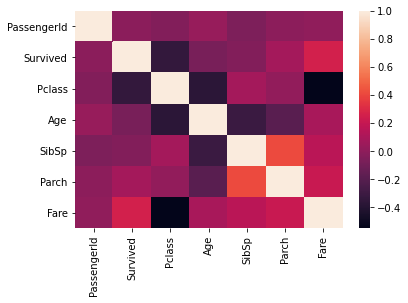

In [91]:
sns.heatmap(df.corr())

In [92]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

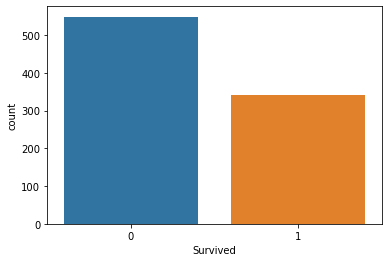

In [93]:
sns.countplot(data=df,x='Survived')

In [94]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
df.Age = df.Age.fillna(df.Age.median())

In [96]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [97]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [98]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [103]:
df1 = df[['Sex','Embarked','Pclass','Survived']]

In [104]:
import numpy as np
df1['Sex']= np.where(df1['Sex']=='male',1,0)

<ipython-input-104-2fc3659e0f0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex']= np.where(df1['Sex']=='male',1,0)


In [105]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [106]:
def change_str_to_num(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2

In [110]:
embarked = []
for i,j in enumerate(df1.Embarked):
    if j == 'S':
        embarked.append(0)
    elif j == 'C':
        embarked.append(1)
    elif j == 'Q':
        embarked.append(2)
    

In [111]:
len(embarked)

891

In [113]:
df1['embarked'] = embarked

<ipython-input-113-9380e6e1171d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['embarked'] = embarked


In [116]:
df1=df1.drop(['Embarked'],axis=1)

In [117]:
df1

,Sex,Pclass,Survived,embarked
0,1,3,0,0
1,0,1,1,1
2,0,3,1,0
3,0,1,1,0
4,1,3,0,0
...,...,...,...,...
886,1,2,0,0
887,0,1,1,0
888,0,3,0,0
889,1,1,1,1


In [118]:
df1.corr()

,Sex,Pclass,Survived,embarked
Sex,1.000000,0.131900,-0.543351,-0.116569
Pclass,0.131900,1.000000,-0.338481,0.045702
Survived,-0.543351,-0.338481,1.000000,0.106811
embarked,-0.116569,0.045702,0.106811,1.000000


In [119]:
df1 = pd.concat([df1, df['Age']], axis=1)

In [123]:
df1

,Sex,Pclass,Survived,embarked,Age
0,1,3,0,0,22.0
1,0,1,1,1,38.0
2,0,3,1,0,26.0
3,0,1,1,0,35.0
4,1,3,0,0,35.0
...,...,...,...,...,...
886,1,2,0,0,27.0
887,0,1,1,0,19.0
888,0,3,0,0,28.0
889,1,1,1,1,26.0


In [126]:
X = df1.drop(['Survived'],axis=1)
X

,Sex,Pclass,embarked,Age
0,1,3,0,22.0
1,0,1,1,38.0
2,0,3,0,26.0
3,0,1,0,35.0
4,1,3,0,35.0
...,...,...,...,...
886,1,2,0,27.0
887,0,1,0,19.0
888,0,3,0,28.0
889,1,1,1,26.0


In [128]:
y= df1['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Logistic Regression

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
score = model.score(X_test, y_test)

In [151]:
score

0.835820895522388

In [155]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.872     , 0.776     , 0.848     , 0.73387097, 0.79032258])

## Decision Tree classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
predicted = model.predict(X_test)
score1 = model.score(X_test, y_test)

In [153]:
score1

0.7649253731343284

In [156]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([0.88     , 0.8      , 0.8      , 0.75     , 0.7983871])

## Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [159]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([0.864     , 0.824     , 0.84      , 0.73387097, 0.79032258])

In [160]:
from sklearn.feature_selection import chi2
f_p_values= chi2(X_train, y_train)

In [161]:
f_p_values

(array([60.36135065, 22.86810551,  4.15183669, 37.18276329]),
 array([7.89479894e-15, 1.73507178e-06, 4.15893889e-02, 1.07560319e-09]))

In [163]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

Sex         7.894799e-15
Pclass      1.735072e-06
embarked    4.158939e-02
Age         1.075603e-09
dtype: float64